In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display import display
pd.options.display.max_columns = 999
from tqdm import tqdm_notebook
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,precision_recall_curve,roc_curve,confusion_matrix

In [48]:
# lst_dt = list( zip([2017]*6+[2018]*9,list(range(6,13))+list(range(1,10))))
lst_dt = list(zip([2017]*12, list(range(1,13))))

In [49]:
lst_df = []
for asof_year,asof_month in tqdm_notebook(lst_dt[:-1]):
    try:
        df = pd.read_csv('../bin/monthly/df_feat_'+str(asof_year).zfill(4)+str(asof_month).zfill(2)+'.csv')
#         print(df.shape)
#         df = df.loc[df["('dt', 'amin')"]<=8]
        df = df.loc[df['PAYMENT-mean']>500]
        print(df.shape)
        lst_df.append(df)
    except:
        print(f'month: {asof_month}, year: {asof_year} is skipped...')

month: 1, year: 2017 is skipped...
(204, 98)
(199, 98)
(779, 98)
(3778, 98)
(5311, 98)
(5515, 98)
(5475, 98)
(5314, 98)
(5268, 98)
(5146, 98)



In [50]:
df_train = pd.concat(lst_df).set_index('Unnamed: 0')

In [51]:
lst_df = []
for asof_year,asof_month in tqdm_notebook(lst_dt[-1:]):
    df = pd.read_csv('../bin/monthly/df_feat_'+str(asof_year).zfill(4)+str(asof_month).zfill(2)+'.csv')
#     print(df.shape)
#     df = df.loc[df["('dt', 'amin')"]<=8]
    df = df.loc[df['PAYMENT-mean']>500]
    print(df.shape)
    lst_df.append(df)
df_test = pd.concat(lst_df).set_index('Unnamed: 0')

(5035, 98)



In [31]:
X_train = df_train.drop('churn',axis=1).values
y_train = df_train['churn'].values
X_test = df_test.drop('churn',axis=1).values
y_test = df_test['churn'].values

In [35]:
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy',min_samples_leaf=3,oob_score=True,n_jobs=-1)

In [41]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict_proba(X_test)[:,1]

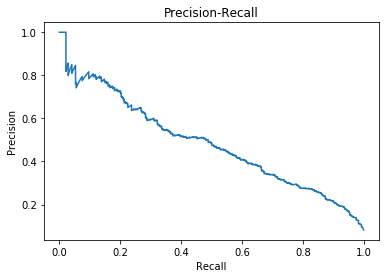

In [42]:
pr,re,th = precision_recall_curve(y_test,y_pred)
plt.title('Precision-Recall')
plt.plot(re,pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

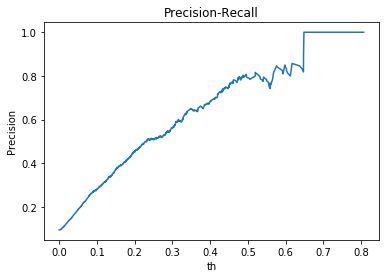

In [43]:
pr,re,th = precision_recall_curve(y_test,y_pred)
plt.title('Precision-Recall')
plt.plot(th,pr[1:])
plt.xlabel('th')
plt.ylabel('Precision')
plt.show()

In [46]:
print(classification_report(y_test,y_pred>0.2))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      4622
         1.0       0.46      0.54      0.49       413

   micro avg       0.91      0.91      0.91      5035
   macro avg       0.71      0.74      0.72      5035
weighted avg       0.92      0.91      0.91      5035

